<a href="https://colab.research.google.com/github/melissang7/Python-IA-Melissa/blob/main/wine_quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [531]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB         #tabela probabilística
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px 
from sklearn.svm import SVC

In [532]:
base_wine = pd.read_csv('/content/winequality-red.csv', sep =';')
base_wine 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [533]:
base_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [534]:
base_wine.describe()
base_wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

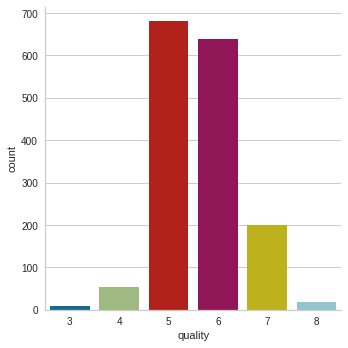

In [535]:
sns.catplot(x='quality', data = base_wine, kind = 'count')

In [536]:
# plot = plt.figure(figsize=(5,5))
# sns.barplot(x='quality', y ='volatile acidity', data = base_wine)

In [537]:
grafico = px.scatter_matrix(base_wine, dimensions=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'])
grafico

In [538]:
# grafico = px.scatter_matrix(base_wine, dimensions=['total sulfur dioxide'])
# grafico

In [ ]:
dados1 = base_wine.loc[base_wine['total sulfur dioxide']>165]
dados1['total sulfur dioxide'] = 46.46779237023139

In [540]:
base_wine.loc[base_wine['total sulfur dioxide']>165] = dados1

In [541]:
grafico = px.scatter_matrix(base_wine, dimensions=['total sulfur dioxide'])
grafico

In [ ]:
dados2 = base_wine.loc[base_wine['citric acid']>0.79]
dados2['citric acid'] = 0.270976	

In [543]:
base_wine.loc[base_wine['citric acid']>0.79] = dados2

In [544]:
grafico = px.scatter_matrix(base_wine, dimensions=['citric acid'])
grafico

In [ ]:
grafico = px.scatter_matrix(base_wine, dimensions=['chlorides'])
grafico

In [545]:
x_wine = base_wine.iloc[:, 0:11].values
x_wine

array([[ 7.4  ,  0.7  ,  0.   , ...,  3.51 ,  0.56 ,  9.4  ],
       [ 7.8  ,  0.88 ,  0.   , ...,  3.2  ,  0.68 ,  9.8  ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  3.26 ,  0.65 ,  9.8  ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  3.42 ,  0.75 , 11.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ],
       [ 6.   ,  0.31 ,  0.47 , ...,  3.39 ,  0.66 , 11.   ]])

In [546]:
type(x_wine)

numpy.ndarray

In [547]:
y_wine = base_wine.iloc[:,11].values      
y_wine

array([5, 5, 5, ..., 6, 5, 6])

In [548]:
from sklearn.model_selection import train_test_split

In [549]:
x_wine_treinamento, x_wine_teste, y_wine_treinamento, y_wine_teste = train_test_split(x_wine, y_wine, test_size=0.25, random_state=0)

In [550]:
x_wine_treinamento.shape

(1199, 11)

In [551]:
y_wine_treinamento.shape

(1199,)

In [552]:
x_wine_teste.shape, y_wine_teste.shape 

((400, 11), (400,))

In [553]:
with open('wine_pkl', mode = 'wb') as f:
 pickle.dump([x_wine_treinamento, y_wine_treinamento, x_wine_teste, y_wine_teste], f)

In [554]:
naive_wine = GaussianNB()

In [555]:
naive_wine.fit(x_wine, y_wine)

GaussianNB()

In [556]:
previsoes = naive_wine.predict(x_wine_teste)
previsoes

array([5, 5, 7, 5, 7, 5, 5, 6, 5, 5, 5, 5, 6, 4, 6, 7, 7, 6, 6, 5, 6, 5,
       6, 4, 6, 5, 5, 7, 5, 6, 7, 6, 6, 5, 6, 7, 5, 6, 6, 6, 5, 6, 8, 7,
       6, 5, 5, 6, 6, 6, 6, 6, 6, 7, 6, 5, 5, 5, 7, 5, 5, 6, 6, 6, 5, 6,
       5, 7, 6, 6, 5, 4, 5, 5, 6, 6, 5, 5, 5, 7, 6, 5, 6, 6, 6, 5, 6, 5,
       5, 5, 5, 5, 6, 5, 7, 5, 7, 6, 5, 6, 7, 7, 6, 7, 6, 5, 6, 5, 6, 5,
       6, 5, 7, 5, 6, 6, 6, 7, 6, 6, 5, 7, 4, 5, 6, 7, 5, 5, 6, 7, 5, 5,
       6, 6, 7, 5, 7, 5, 7, 5, 6, 5, 5, 5, 5, 6, 7, 7, 6, 6, 6, 6, 5, 5,
       6, 5, 6, 5, 6, 6, 6, 6, 7, 5, 7, 5, 6, 7, 5, 6, 6, 6, 5, 7, 4, 7,
       6, 7, 6, 5, 5, 8, 5, 7, 7, 5, 5, 6, 5, 6, 6, 6, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 6, 5, 5, 5, 5, 5, 6, 7, 5, 6, 5, 4, 7, 5, 5, 6, 6, 6, 5,
       5, 6, 7, 6, 5, 6, 7, 6, 5, 6, 5, 6, 5, 6, 7, 6, 7, 7, 7, 7, 5, 5,
       5, 5, 6, 5, 6, 5, 4, 6, 5, 5, 5, 5, 6, 6, 5, 5, 5, 7, 5, 8, 5, 6,
       5, 5, 6, 5, 5, 6, 6, 6, 6, 8, 7, 6, 7, 5, 7, 7, 5, 7, 6, 7, 6, 5,
       6, 5, 7, 6, 6, 4, 6, 5, 5, 6, 5, 6, 5, 5, 6,

In [557]:
y_wine_teste

array([6, 5, 7, 6, 5, 6, 5, 6, 4, 5, 5, 5, 6, 5, 6, 6, 7, 5, 5, 4, 7, 6,
       6, 4, 6, 5, 5, 7, 5, 6, 5, 6, 5, 6, 7, 7, 5, 6, 6, 7, 5, 7, 6, 6,
       5, 5, 6, 6, 6, 5, 5, 5, 6, 6, 6, 5, 5, 5, 6, 5, 5, 6, 6, 6, 5, 6,
       5, 5, 6, 6, 6, 6, 4, 6, 5, 6, 5, 5, 5, 6, 6, 5, 6, 6, 6, 5, 6, 5,
       5, 5, 5, 6, 4, 5, 7, 6, 6, 5, 6, 5, 8, 6, 6, 6, 5, 5, 5, 5, 7, 5,
       6, 5, 7, 5, 6, 6, 6, 7, 6, 6, 5, 7, 5, 5, 6, 6, 5, 5, 5, 6, 6, 6,
       6, 6, 6, 5, 6, 5, 8, 5, 6, 5, 6, 5, 4, 6, 7, 6, 5, 6, 6, 5, 5, 5,
       6, 6, 3, 6, 6, 6, 6, 6, 6, 6, 5, 5, 6, 6, 6, 6, 5, 5, 5, 8, 5, 6,
       6, 7, 7, 5, 5, 7, 5, 6, 6, 4, 5, 6, 5, 5, 6, 5, 6, 6, 5, 5, 5, 5,
       5, 5, 5, 6, 6, 5, 6, 6, 5, 6, 7, 6, 6, 6, 5, 5, 5, 6, 5, 6, 6, 5,
       5, 5, 6, 6, 5, 6, 6, 6, 3, 6, 5, 5, 7, 6, 7, 6, 6, 7, 7, 6, 5, 6,
       5, 5, 6, 5, 5, 5, 5, 6, 5, 5, 5, 6, 6, 5, 5, 5, 6, 7, 5, 6, 5, 6,
       5, 4, 5, 5, 6, 7, 6, 5, 5, 4, 5, 6, 7, 6, 6, 7, 5, 7, 5, 6, 6, 5,
       5, 5, 6, 6, 5, 6, 6, 6, 5, 6, 6, 5, 6, 5, 6,

In [558]:
from sklearn.metrics import accuracy_score  

In [559]:
accuracy_score(y_wine_teste, previsoes)  

0.5725

In [560]:
from sklearn.metrics import confusion_matrix   

In [561]:
confusion_matrix(y_wine_teste, previsoes)   

array([[  0,   0,   1,   1,   0,   0],
       [  0,   1,   9,   3,   0,   1],
       [  1,   8, 108,  44,   8,   0],
       [  0,   2,  42,  93,  31,   2],
       [  0,   0,   1,  11,  27,   1],
       [  0,   0,   0,   2,   3,   0]])

In [562]:
from yellowbrick.classifier import ConfusionMatrix

0.5725

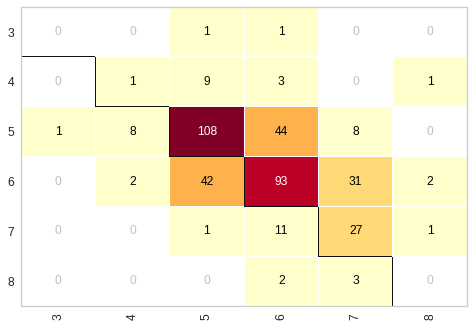

In [563]:
cm = ConfusionMatrix(naive_wine)
cm.fit(x_wine_teste, y_wine_teste)
cm.score(x_wine_teste, y_wine_teste)

In [564]:
from sklearn.svm import SVC

In [565]:
with open ('/content/wine_pkl', 'rb') as f:
  x_wine_treinamento, y_wine_treinamento, x_wine_teste, y_wine_teste = pickle.load(f)

In [566]:
SVM_wine = SVC(kernel='linear', random_state=1, C = 1.0)             
SVM_wine.fit(x_wine_treinamento, y_wine_treinamento) 

SVC(kernel='linear', random_state=1)

In [567]:
previsoes = SVM_wine.predict(x_wine_teste)
previsoes

array([6, 5, 6, 5, 6, 5, 5, 6, 5, 5, 5, 5, 6, 5, 5, 6, 6, 6, 6, 5, 6, 5,
       6, 6, 5, 5, 5, 6, 5, 6, 6, 6, 6, 5, 6, 6, 5, 5, 6, 6, 5, 6, 6, 6,
       6, 5, 5, 6, 5, 6, 5, 5, 6, 6, 6, 5, 5, 5, 6, 5, 5, 6, 6, 6, 5, 6,
       5, 6, 6, 6, 5, 5, 5, 5, 5, 6, 5, 5, 5, 6, 6, 5, 6, 6, 5, 5, 6, 5,
       5, 5, 5, 5, 6, 5, 6, 5, 6, 5, 5, 6, 6, 6, 6, 6, 6, 5, 6, 5, 6, 5,
       6, 5, 6, 5, 6, 6, 6, 6, 6, 6, 5, 6, 5, 5, 6, 6, 5, 5, 6, 6, 5, 5,
       6, 6, 6, 5, 6, 5, 6, 5, 6, 5, 5, 5, 5, 6, 6, 6, 6, 5, 6, 6, 5, 6,
       6, 6, 5, 5, 6, 6, 6, 5, 6, 5, 6, 5, 6, 6, 5, 6, 6, 5, 5, 6, 6, 6,
       6, 6, 6, 5, 5, 6, 5, 6, 6, 5, 5, 6, 5, 6, 6, 6, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 6, 5, 5, 5, 5, 5, 6, 6, 5, 6, 6, 5, 6, 5, 5, 6, 6, 6, 5,
       5, 6, 6, 6, 5, 6, 6, 6, 5, 5, 5, 6, 5, 6, 6, 6, 6, 6, 6, 6, 5, 5,
       5, 5, 6, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 6, 5, 5,
       5, 5, 5, 5, 6, 6, 6, 5, 5, 6, 6, 6, 6, 5, 6, 6, 5, 6, 5, 6, 6, 5,
       5, 5, 6, 6, 6, 6, 6, 5, 5, 6, 5, 5, 5, 5, 6,

In [568]:
y_wine_teste

array([6, 5, 7, 6, 5, 6, 5, 6, 4, 5, 5, 5, 6, 5, 6, 6, 7, 5, 5, 4, 7, 6,
       6, 4, 6, 5, 5, 7, 5, 6, 5, 6, 5, 6, 7, 7, 5, 6, 6, 7, 5, 7, 6, 6,
       5, 5, 6, 6, 6, 5, 5, 5, 6, 6, 6, 5, 5, 5, 6, 5, 5, 6, 6, 6, 5, 6,
       5, 5, 6, 6, 6, 6, 4, 6, 5, 6, 5, 5, 5, 6, 6, 5, 6, 6, 6, 5, 6, 5,
       5, 5, 5, 6, 4, 5, 7, 6, 6, 5, 6, 5, 8, 6, 6, 6, 5, 5, 5, 5, 7, 5,
       6, 5, 7, 5, 6, 6, 6, 7, 6, 6, 5, 7, 5, 5, 6, 6, 5, 5, 5, 6, 6, 6,
       6, 6, 6, 5, 6, 5, 8, 5, 6, 5, 6, 5, 4, 6, 7, 6, 5, 6, 6, 5, 5, 5,
       6, 6, 3, 6, 6, 6, 6, 6, 6, 6, 5, 5, 6, 6, 6, 6, 5, 5, 5, 8, 5, 6,
       6, 7, 7, 5, 5, 7, 5, 6, 6, 4, 5, 6, 5, 5, 6, 5, 6, 6, 5, 5, 5, 5,
       5, 5, 5, 6, 6, 5, 6, 6, 5, 6, 7, 6, 6, 6, 5, 5, 5, 6, 5, 6, 6, 5,
       5, 5, 6, 6, 5, 6, 6, 6, 3, 6, 5, 5, 7, 6, 7, 6, 6, 7, 7, 6, 5, 6,
       5, 5, 6, 5, 5, 5, 5, 6, 5, 5, 5, 6, 6, 5, 5, 5, 6, 7, 5, 6, 5, 6,
       5, 4, 5, 5, 6, 7, 6, 5, 5, 4, 5, 6, 7, 6, 6, 7, 5, 7, 5, 6, 6, 5,
       5, 5, 6, 6, 5, 6, 6, 6, 5, 6, 6, 5, 6, 5, 6,

In [569]:
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_wine_teste,previsoes)
accuracy

0.625

0.625

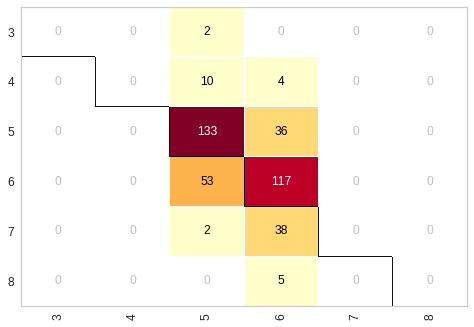

In [570]:
cm = ConfusionMatrix(SVM_wine)
cm.fit(x_wine_treinamento, y_wine_treinamento)
cm.score(x_wine_teste, y_wine_teste)

In [571]:
#fa = input('Digite o valor da acidez fixa: ')
#va = input('Digite o valor da acidez volátil: ')
#cd = input('Digite o valor do ácido cítrico: ')
#rs = input('Digite o valor do açúcar residual:' )
#cl = input('Digite o valor dos cloretos: ')
#fsd = input('Digite o valor do dióxido de enxofre livre: ')
#tsd = input('Digite o valor do dióxido de enxofre total: ')
#D = input('Digite o valor da densidade: ')
#ph = input('Digite o valor do ph: ')
##sul = input('Digite o valor dos sulfatos: ')
#alc = input('Digite o valor do alcóol: ')

#previsao = naive_wine.predict([[fa, va, cd, rs, cl, fsd, tsd, D, ph, sul, alc]])
#previsao

0.49

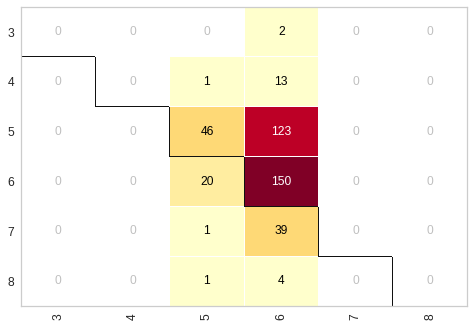

In [572]:
SVM_wine = SVC(kernel='poly', random_state=1, C = 1.0)             
SVM_wine.fit(x_wine_treinamento, y_wine_treinamento)

previsoes = SVM_wine.predict(x_wine_teste)
previsoes

accuracy = accuracy_score(y_wine_teste,previsoes)
accuracy

cm = ConfusionMatrix(SVM_wine)
cm.fit(x_wine_treinamento, y_wine_treinamento)
cm.score(x_wine_teste, y_wine_teste)

0.49

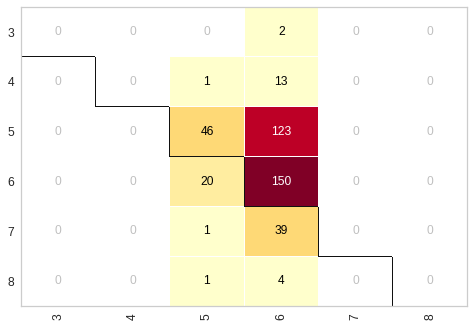

In [573]:
SVM_wine = SVC(kernel='poly', random_state=1, C = 1.0)             
SVM_wine.fit(x_wine_treinamento, y_wine_treinamento)

previsoes = SVM_wine.predict(x_wine_teste)
previsoes

accuracy = accuracy_score(y_wine_teste,previsoes)
accuracy

cm = ConfusionMatrix(SVM_wine)
cm.fit(x_wine_treinamento, y_wine_treinamento)
cm.score(x_wine_teste, y_wine_teste)

In [574]:
x_wine

array([[ 7.4  ,  0.7  ,  0.   , ...,  3.51 ,  0.56 ,  9.4  ],
       [ 7.8  ,  0.88 ,  0.   , ...,  3.2  ,  0.68 ,  9.8  ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  3.26 ,  0.65 ,  9.8  ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  3.42 ,  0.75 , 11.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ],
       [ 6.   ,  0.31 ,  0.47 , ...,  3.39 ,  0.66 , 11.   ]])

In [575]:
y_wine

array([5, 5, 5, ..., 6, 5, 6])

In [576]:
arvore_wine_quality = DecisionTreeClassifier(criterion='entropy')               
arvore_wine_quality.fit(x_wine, y_wine)  

DecisionTreeClassifier(criterion='entropy')

In [577]:
arvore_wine_quality.feature_importances_  

array([0.0431667 , 0.12156886, 0.06920699, 0.0587851 , 0.0784612 ,
       0.06453498, 0.08771199, 0.05703694, 0.07737393, 0.155033  ,
       0.1871203 ])

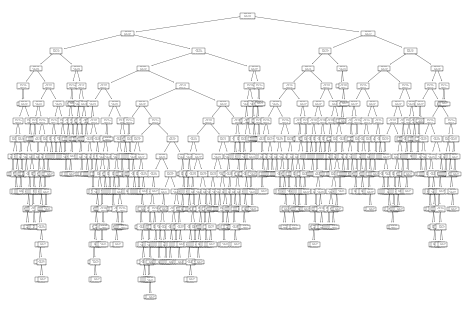

In [578]:
from sklearn import tree
tree.plot_tree(arvore_wine_quality);

In [579]:
accuracy = accuracy_score(y_wine_teste, previsoes)               
accuracy

0.49